In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

In [2]:
nlp = spacy.load('en_core_web_sm')
df = pd.read_json("./articles.json", orient="index")
df['nlp'] = df['text'].apply(nlp)

In [3]:
vectors = np.zeros(shape=(len(df['nlp']),len(df['nlp'].iloc[0].vector)))
for i, doc in enumerate(df['nlp']):
    # not sure if this ever happens
    if not doc.has_vector:
        continue
    vectors[i] = doc.vector

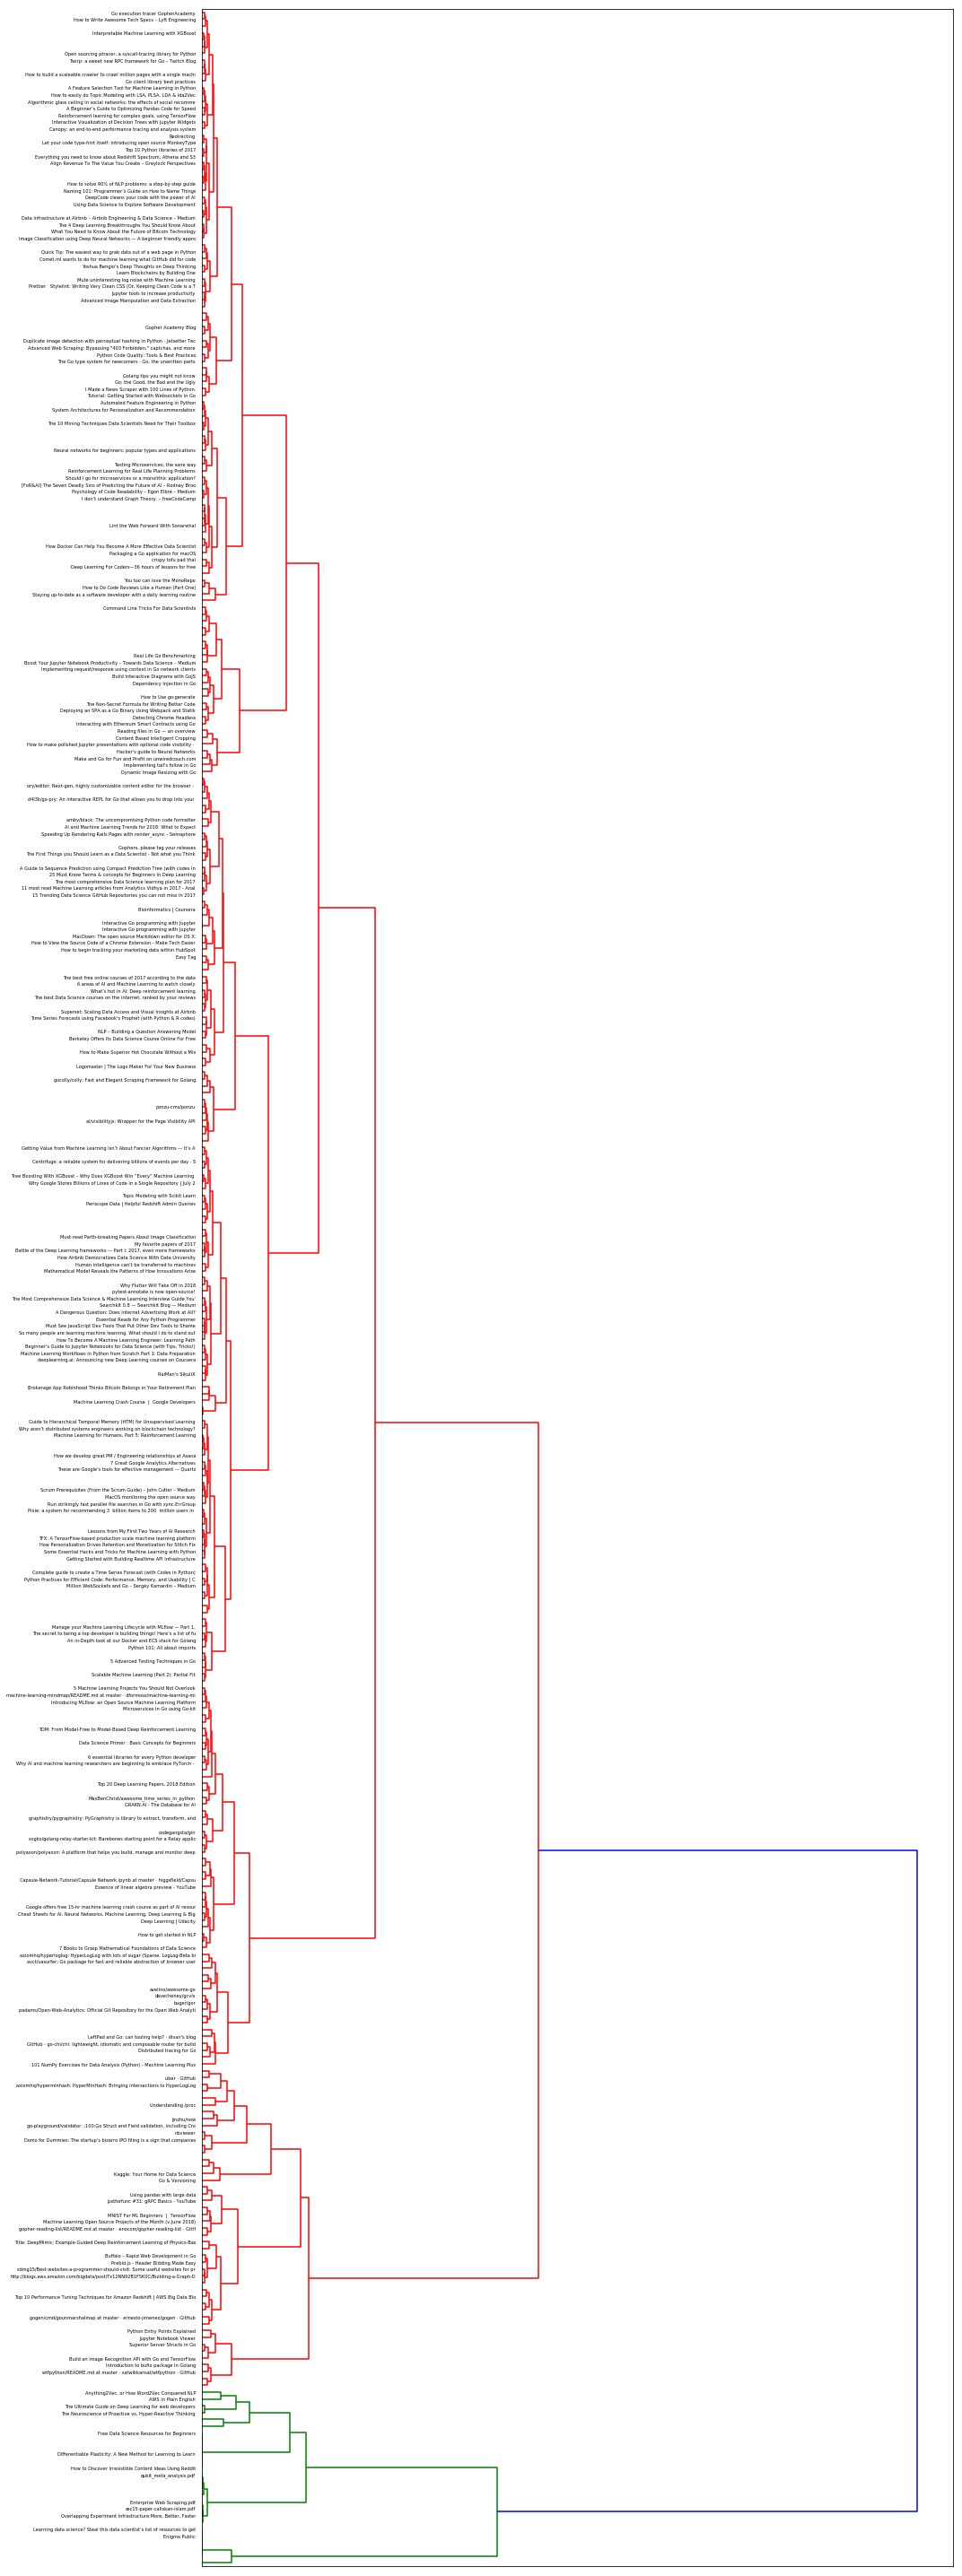

In [4]:
distances = 1 - cosine_similarity(vectors)
linkage_matrix = ward(distances)

fig, ax = plt.subplots(figsize=(15, 40)) # set size
dendrogram(
    linkage_matrix, 
    orientation="right", 
    labels=df['given_title'].values
)

plt.tick_params(
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False
)

plt.tight_layout() #show plot with tight layout

plt.savefig('spacy_clusters.png', dpi=200) #save figure as ward_clusters